In [46]:
import np

from plot_utils import plot_loss, plot_histogram_balance_of_dataset, plot_confusion_matrix, plot_multiclass_roc_auc
from model import Model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from plot_utils import plot_multiclass_calibration_curve

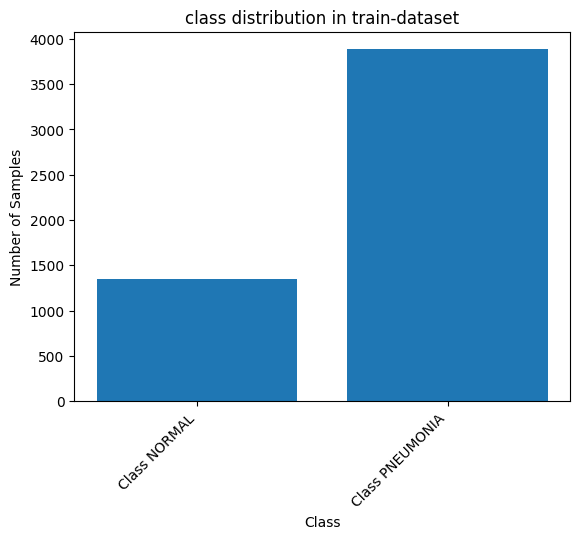

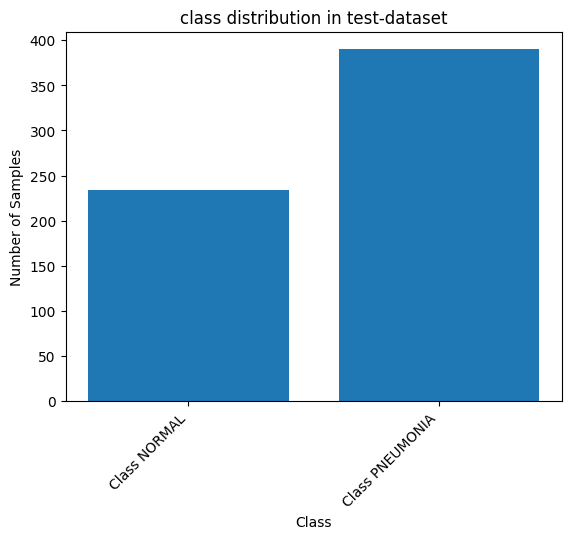

In [47]:
train_val_split_ratio = 0.9
batch_size = 16
learning_rate = 1e-6
patience_early_stopping = 10
patience_reduce_learning_rate = 4
weight_decay = 1e-4
momentum = 0.9
epochs = 500
train_dir = "chest_xray/train"
test_dir = "chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate, train_dir=train_dir,
              weight_decay=weight_decay, momentum = momentum, test_dir=test_dir,
              train_val_split_ratio=train_val_split_ratio)

plot_histogram_balance_of_dataset(train_dir, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(test_dir, "class distribution in test-dataset")

In [ ]:
train_losses, val_losses = model.train_model(epochs)

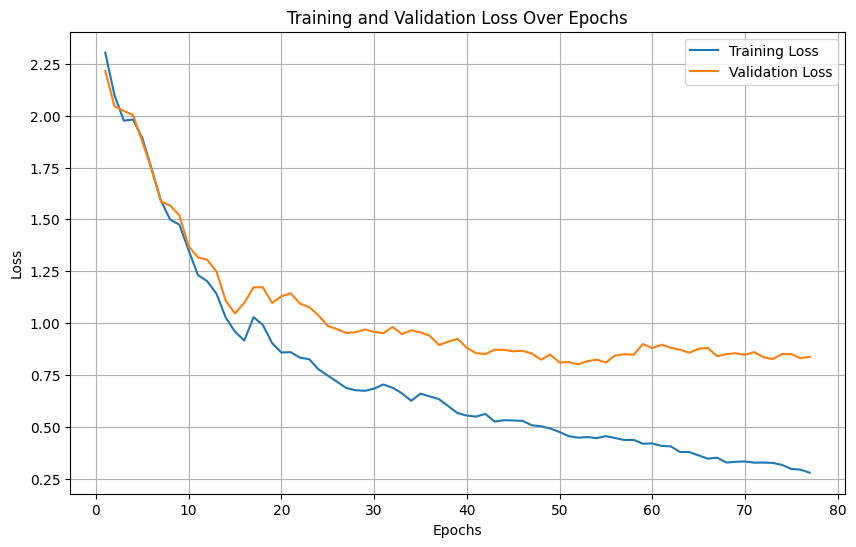

In [34]:
plot_loss(train_losses, val_losses)

In [35]:
true_labels, predicted_labels, confidence_values, confidence_all_classes = model.evaluate()

In [36]:
print("F1-score: " + str(f1_score(true_labels, predicted_labels, average='macro')))
print("Recall: " + str(recall_score(true_labels, predicted_labels, average='macro')))
print("Precision: " + str(precision_score(true_labels, predicted_labels, average='macro')))
print("Accuracy: " + str(accuracy_score(true_labels, predicted_labels)))

F1-score: 0.47137622547458613
Recall: 0.5
Precision: 0.533825897508762
Accuracy: 0.5


/Users/michael/PycharmProjects/ModelCalibrationDeepLearning/venev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


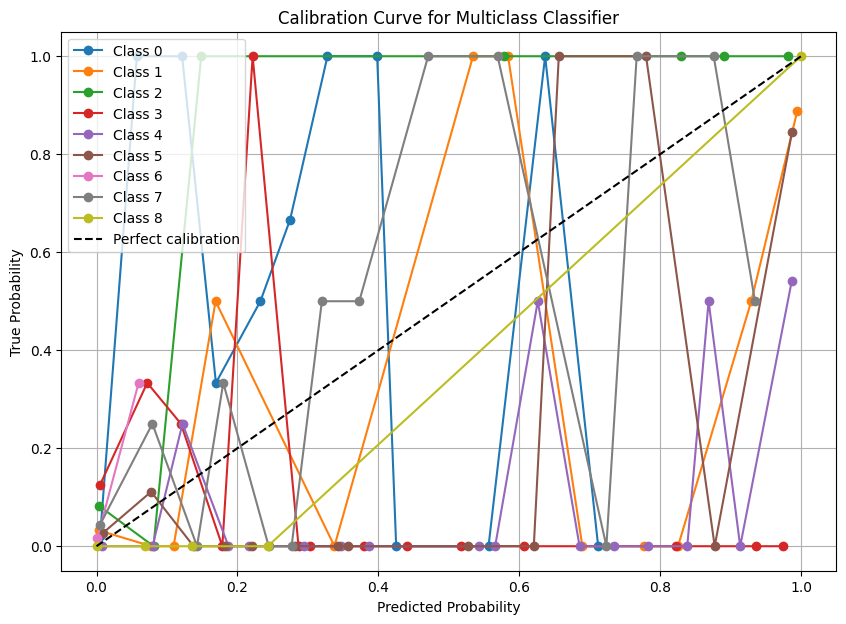

In [37]:
plot_multiclass_calibration_curve(y_true = true_labels, y_pred_proba = np.array(confidence_all_classes))

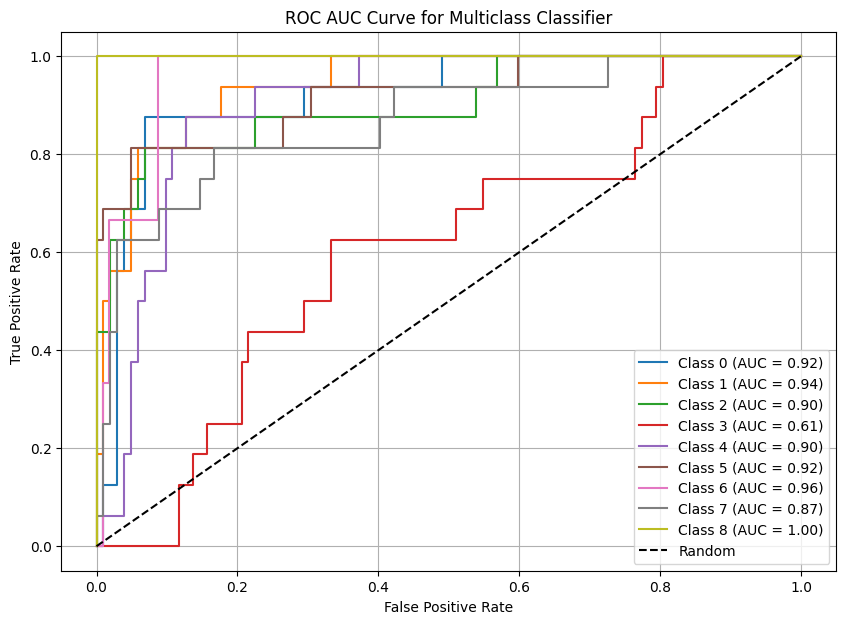

In [38]:
plot_multiclass_roc_auc(y_true=true_labels, y_pred_proba= np.array(confidence_all_classes))

In [39]:
import torch

torch.save(model.model.state_dict(), "model2.pth")

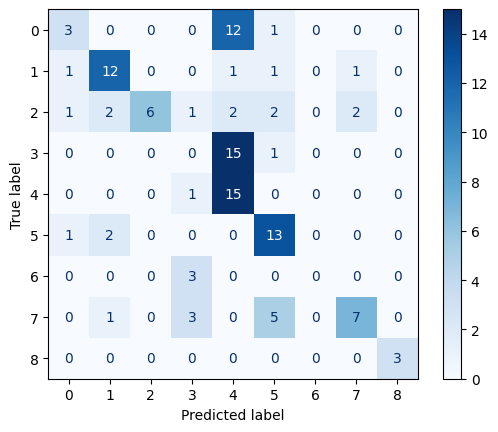

In [40]:
plot_confusion_matrix(true_labels = true_labels, predicted_labels = predicted_labels)